# Libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
from statsmodels.formula.api import ols

# Load data

In [37]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


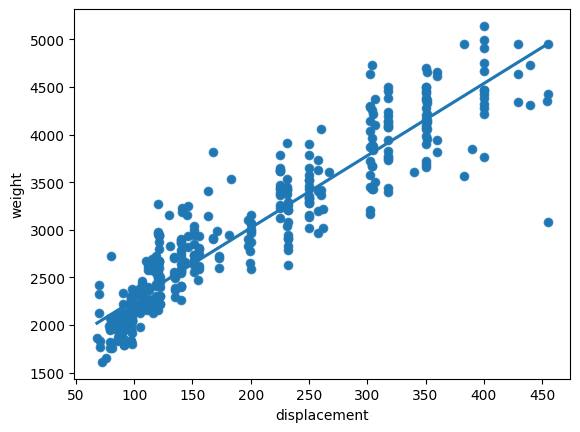

In [38]:
# Draw the scatter plot
sns.scatterplot(data=df, x='displacement',y='weight')
sns.regplot(x="displacement",
            y="weight",
            data=df,
            ci=None)

# Show the plot
plt.show()

# Transoform data

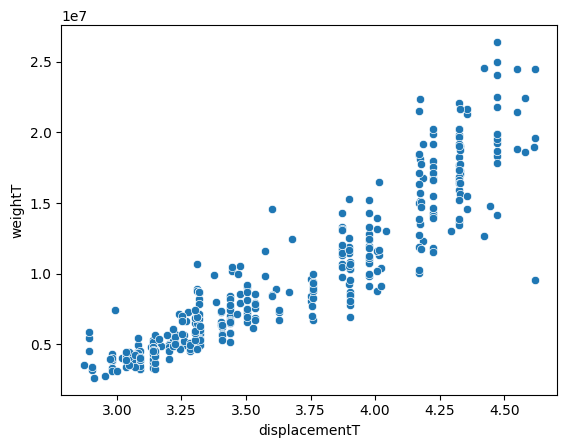

In [39]:
#Transforming the explanatory and response variable
df['weightT'] = df['weight']**2
df['displacementT'] = df['displacement']**0.25

# Draw the scatter plot
sns.scatterplot(data=df, x='displacementT',y='weightT')

# Show the plot
plt.show()

# Fit model

In [40]:
# Create the model object
model_displacementT_vs_weightT = ols("weightT ~ displacementT", data=df)

# Fit the model
model_displacementT_vs_weightT = model_displacementT_vs_weightT.fit()

# Print the parameters of the fitted model
model_displacementT_vs_weightT.params

Intercept       -2.780186e+07
displacementT    1.028226e+07
dtype: float64

# Make prediction

In [41]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'displacement':  np.arange(75,450),
                                 'displacementT': np.arange(75,450)**0.25})

# Print it
explanatory_data.head()

,displacement,displacementT
0,75,2.942831
1,76,2.952592
2,77,2.962257
3,78,2.971828
4,79,2.981308


In [42]:
# Use model_distance_vs_fare to predict with explanatory_data, call it price_prediction
predictionT = model_displacementT_vs_weightT.predict(explanatory_data["displacementT"])

# Create prediction_data
prediction_data = explanatory_data.assign(
    weightT = predictionT)

# Print the result
prediction_data.head()

,displacement,displacementT,weightT
0,75,2.942831,2.457093e+06
1,76,2.952592,2.557456e+06
2,77,2.962257,2.656833e+06
3,78,2.971828,2.755247e+06
4,79,2.981308,2.852719e+06


In [43]:
# Back transformation
prediction_data["weight"] = np.sqrt(prediction_data["weightT"]) # inverse of **2

# Visualizing predictions

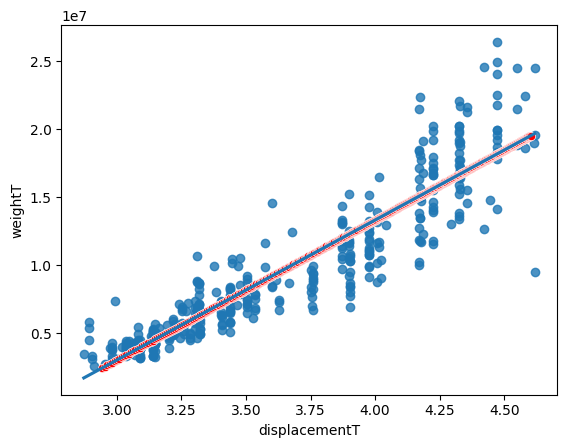

In [44]:
# Plot transformed data
fig = plt.figure()

sns.regplot(x="displacementT",
            y="weightT",
            data=df,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="displacementT",
                y="weightT",
                data=prediction_data,
                color="red")

# Show the layered plot
plt.show()

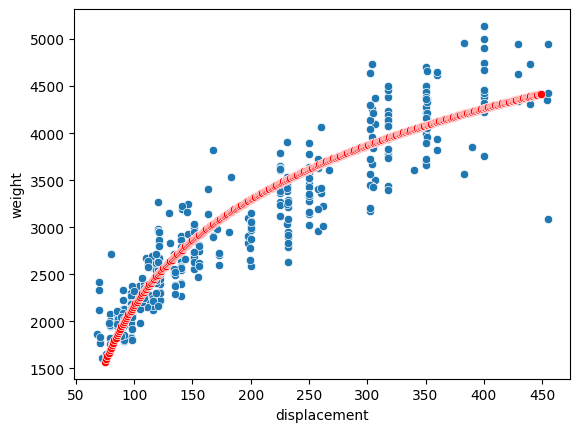

In [45]:
# Plot original data
fig = plt.figure()

sns.scatterplot(x="displacement",
                y="weight",
                data=df)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="displacement",
                y="weight",
                data=prediction_data,
                color="red")

# Show the layered plot
plt.show()

# Analyze results

In [46]:
model_displacementT_vs_weightT.params

Intercept       -2.780186e+07
displacementT    1.028226e+07
dtype: float64

In [47]:
model_displacementT_vs_weightT.fittedvalues

0      1.523823e+07
1      1.667208e+07
2      1.561869e+07
3      1.513270e+07
4      1.506191e+07
           ...     
393    7.566962e+06
394    4.466843e+06
395    7.246849e+06
396    6.229860e+06
397    6.158738e+06
Length: 398, dtype: float64

In [48]:
model_displacementT_vs_weightT.resid

0     -2.960215e+06
1     -3.033830e+06
2     -3.812598e+06
3     -3.347207e+06
4     -3.166305e+06
           ...     
393    2.171382e+05
394    7.005654e+04
395   -1.979824e+06
396    6.607654e+05
397    1.239662e+06
Length: 398, dtype: float64

In [49]:
model_displacementT_vs_weightT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                weightT   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2198.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.05e-163
Time:                        14:21:55   Log-Likelihood:                -6363.9
No. Observations:                 398   AIC:                         1.273e+04
Df Residuals:                     396   BIC:                         1.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.78e+07   8.04e+05    -34.595      0.000   -2.94e+07   -2.62e+07
displacementT  1.028e+07   2.19e+05     46.882      0.000    9.85e+06    1.07e+07
==============================================================================
Omnibus:                       31.002   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.342
Skew:                           0.270   Prob(JB):                     7.29e-22
Kurtosis:                       5.362   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnostic plots

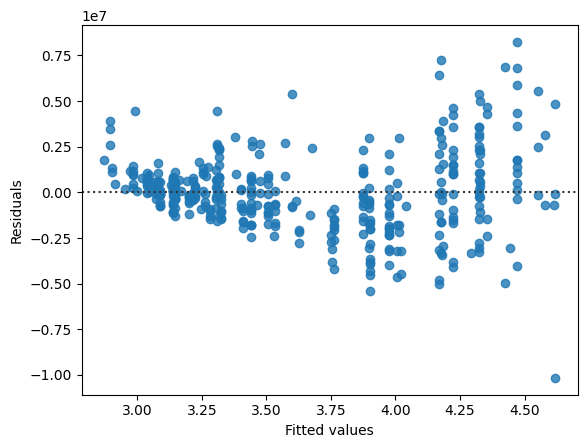

In [51]:
# Plot the residuals vs. fitted values
sns.residplot(x="displacementT", y="weightT", data=df)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

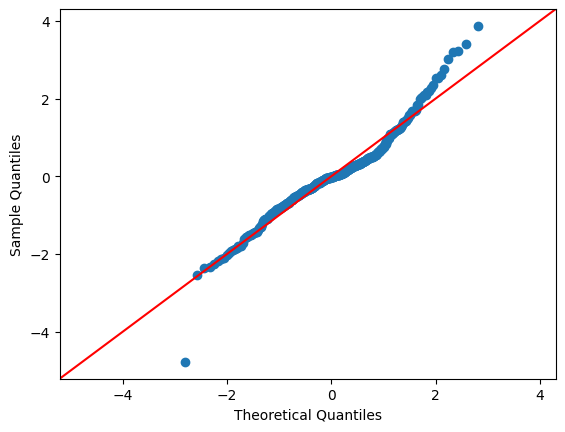

In [55]:
# Create the Q-Q plot of the residuals
qqplot(data=model_displacementT_vs_weightT.resid, fit=True, line="45")

# Show the plot
plt.show()

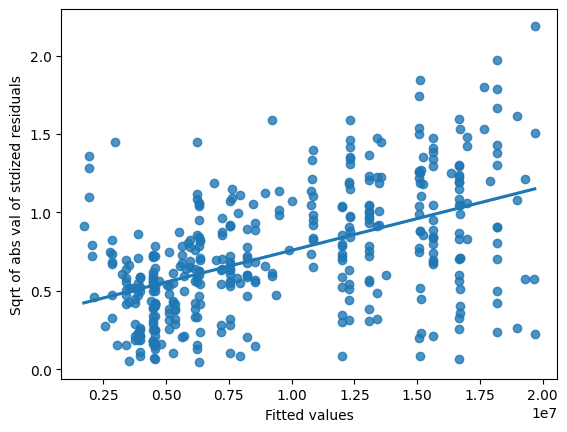

In [57]:
# Preprocessing steps
model_norm_residuals = model_displacementT_vs_weightT.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=model_displacementT_vs_weightT.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

# Extreme values analysis

In [59]:
# Create summary_info
summary_info = model_displacementT_vs_weightT.get_influence().summary_frame()

In [60]:
# Add the hat_diag column to df, name it leverage
df["leverage"] = summary_info["hat_diag"]

# Sort df by leverage in descending order and print the head
print(df.sort_values(by="leverage", ascending=False).head())

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
8   14.0          8         455.0       225.0    4425          10.0   
13  14.0          8         455.0       225.0    3086          10.0   
95  12.0          8         455.0       225.0    4951          11.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   

    model_year origin                      name   weightT  displacementT  \
8           70    usa          pontiac catalina  19580625       4.618520   
13          70    usa   buick estate wagon (sw)   9523396       4.618520   
95          73    usa  buick electra 225 custom  24512401       4.618520   
6           70    usa          chevrolet impala  18957316       4.615980   
7           70    usa         plymouth fury iii  18593344       4.579976   

    leverage  
8   0.012805  
13  0.012805  
95  0.012805  
6   0.012753  
7   0.012017  


In [61]:
# Add the cooks_d column to df, name it cooks_dist
df["cooks_dist"] = summary_info["cooks_d"]

# Sort df by cooks_dist in descending order and print the head.
print(df.sort_values(by="cooks_dist", ascending=False).head())

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
13   14.0          8         455.0       225.0    3086          10.0   
44   13.0          8         400.0       175.0    5140          12.0   
103  11.0          8         400.0       150.0    4997          14.0   
42   12.0          8         383.0       180.0    4955          11.5   
90   12.0          8         429.0       198.0    4952          11.5   

     model_year origin                      name   weightT  displacementT  \
13           70    usa   buick estate wagon (sw)   9523396       4.618520   
44           71    usa       pontiac safari (sw)  26419600       4.472136   
103          73    usa          chevrolet impala  24970009       4.472136   
42           71    usa         dodge monaco (sw)  24552025       4.423843   
90           73    usa  mercury marquis brougham  24522304       4.551078   

     leverage  cooks_dist  
13   0.012805    0.149080  
44   0.009979    0.075883  
103  0.009979    0.0